In [ ]:
### Final Report Code, Jennifer Gipson 12/5/2025

## import all needed libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [2]:
# import data
# background, practices, professional developments, indices

backgd = pd.read_csv("background.csv",sep = ";") 
prac = pd.read_csv("practices.csv",sep = ";")
pds = pd.read_csv("pd.csv",sep = ";")
ind = pd.read_csv("indices.csv",sep = ";")

In [ ]:
### Preprocessing !

tar = "T4JOYTCH" #joy
pred = ["T4TYEXPE", "T4TCSIZE", "T4CLASM",
"T4MOSU", "T4WLOADT", "T4STBEH"]
# years teaching
# class size
# management( tell kids to sit) 
# doing something good 
# work load 
# student behavior 

### save as to main data variable as a copy and combine needed columns
data = backgd[pred+[tar]].copy()

### define values for omitting, invalid, etc
omit = { "T4TYEXPE":{9:np.nan,8:np.nan}, "T4TCSIZE":{9:np.nan,8:np.nan}, "T4CLASM":{9999:np.nan,9998:np.nan},
"T4MOSU":{9999: np.nan, 9998: np.nan}, "T4WLOADT":{9999:np.nan,9998: np.nan}, "T4STBEH":{9999:np.nan,9998:np.nan},
"T4JOYTCH":{9999:np.nan,9998:np.nan} }

### omit the values with NaN and drop them
data = data.replace(omit)
data = data.dropna()

### define variable for later splitting, training, modeling etc
X = data[pred]
y = data[tar]

#data general stats
data.describe()

,T4TYEXPE,T4TCSIZE,T4CLASM,T4MOSU,T4WLOADT,T4STBEH,T4JOYTCH
count,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000
mean,1.104425,2.392786,12.173607,13.287840,9.678535,9.216361,13.857346
std,0.430985,0.807868,1.757651,2.007848,2.068032,2.023821,2.074341
min,1.000000,1.000000,5.918700,5.974490,5.877050,5.722100,6.378620
25%,1.000000,2.000000,10.982310,11.295690,8.290420,8.077980,12.290320
50%,1.000000,2.000000,12.466030,13.538560,9.564900,9.092050,13.862500
75%,1.000000,3.000000,14.173850,15.199670,11.159610,10.666830,16.313870
max,4.000000,4.000000,14.173850,15.199670,13.893270,13.342500,16.313870


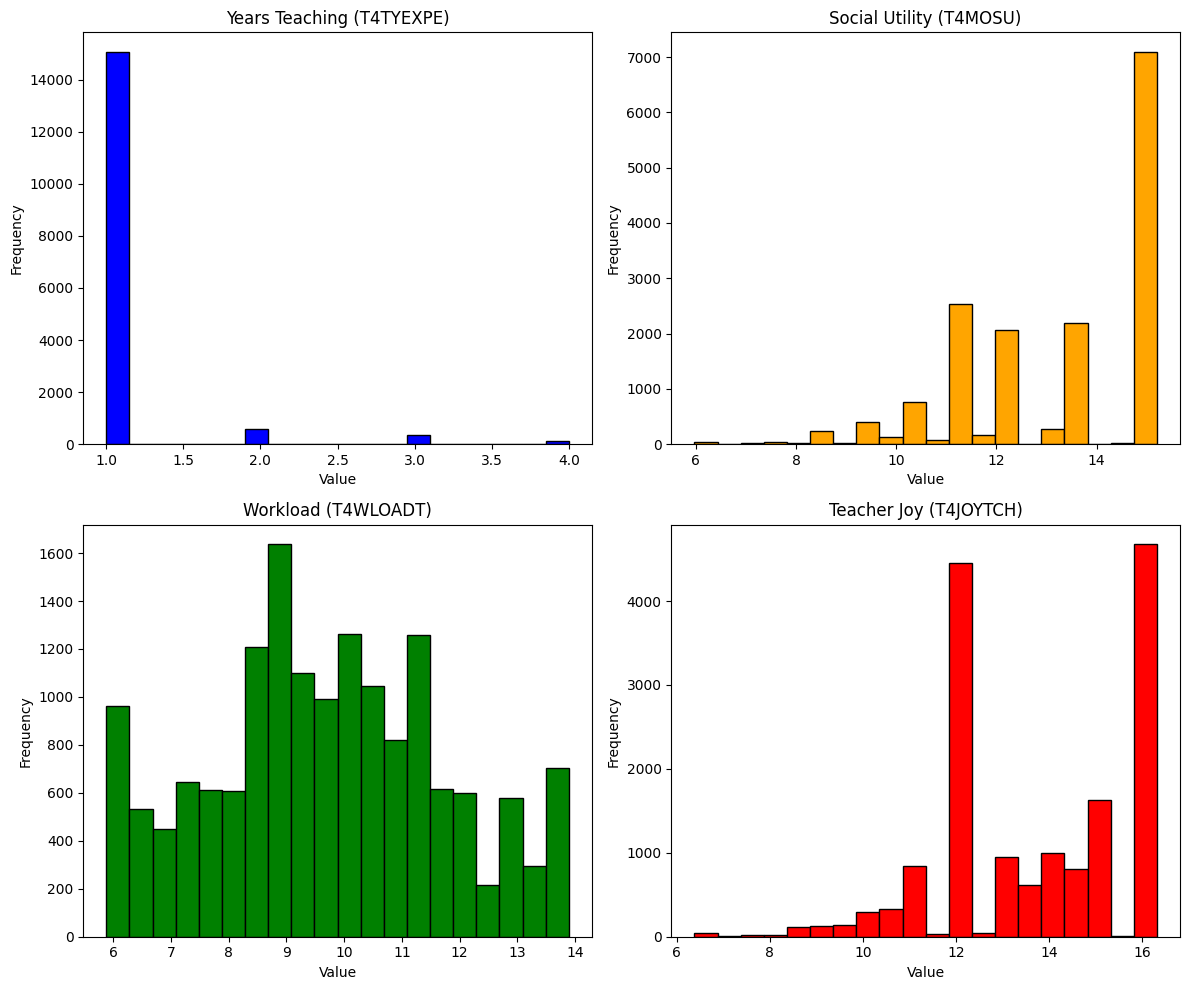

In [ ]:
#### List of variables
varz = {"T4TYEXPE": "Years Teaching (T4TYEXPE)","T4MOSU": "Social Utility (T4MOSU)",
        "T4WLOADT": "Workload (T4WLOADT)","T4JOYTCH": "Teacher Joy (T4JOYTCH)"}

### colors for plotting
colors = ["blue", "orange", "green", "red"]

### now plot !
i = 1

plt.figure(figsize=(12, 10))
for k in varz:
    plt.subplot(2, 2, i)
    plt.hist(data[k], bins=20, color=colors[i-1],edgecolor="black")
    plt.title(varz[k], fontsize=12)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    i += 1

plt.tight_layout()
plt.show()

In [ ]:
### much of this code is adapted from 
# AOS C111 in class coding assignments and homework sets !

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###############################################

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

###############################################

ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

###############################################

mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPRegressor(hidden_layer_sizes=(30,30),
                           max_iter=2500, random_state=0))
])
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

###############################################

svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

###############################################

rf = RandomForestRegressor(n_estimators=350, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

###############################################

##RMSE for the 5 model types
rmse_lr = np.sqrt(np.mean((y_test - y_pred_lr)**2))
rmse_ridge = np.sqrt(np.mean((y_test - y_pred_ridge)**2))
rmse_svr = np.sqrt(np.mean((y_test - y_pred_svr)**2))
rmse_mlp = np.sqrt(np.mean((y_test-y_pred_mlp)**2))
rmse_rf = np.sqrt(np.mean((y_test-y_pred_rf)**2))

In [6]:
### create RMSE table 

rmse_tab = pd.DataFrame({
    "Model":[
        "Linear Regression",
        "Ridge Regression",
        "Support Vector Regression",
        "MLP Regressor",
        "Random Forest Regressor"],
    "RMSE":[
        rmse_lr,
        rmse_ridge,
        rmse_svr,
        rmse_mlp,
        rmse_rf
    ]})

print(rmse_tab.to_string(index=False))

                    Model     RMSE
        Linear Regression 1.888322
         Ridge Regression 1.888321
Support Vector Regression 1.942962
            MLP Regressor 1.897408
  Random Forest Regressor 1.859325


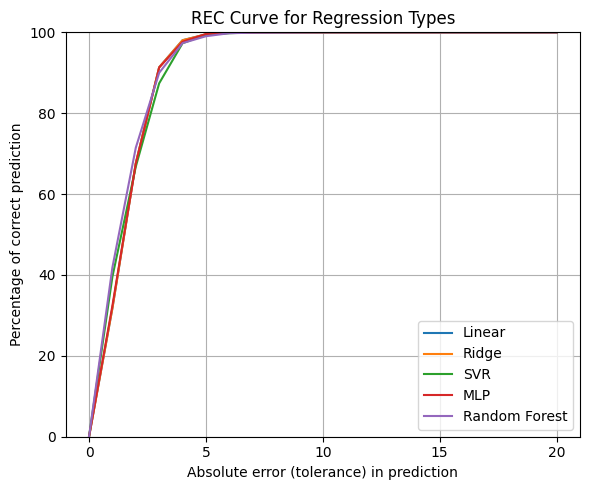

In [ ]:
### create rec function
def rec(pred, actual, tol):
    pred = np.array(pred)
    actual = np.array(actual)
    abs_err = np.abs(pred-actual)
    final = 100*np.mean(abs_err <= tol)
    return final

tol_max = 20

rec_lr    = []
rec_ridge = []
rec_svr   = []
rec_mlp   = []
rec_rf    = []

for p in range(tol_max + 1):
    rec_lr.append(rec(y_pred_lr,    y_test, p))
    rec_ridge.append(rec(y_pred_ridge, y_test, p))
    rec_svr.append(rec(y_pred_svr,  y_test, p))
    rec_mlp.append(rec(y_pred_mlp,  y_test, p))
    rec_rf.append(rec(y_pred_rf,    y_test, p))

###############################################
### plot

plt.figure(figsize=(6,5))
plt.title("REC Curve for Regression Types")
plt.xlabel("Absolute error (tolerance) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range((tol_max//5)+1)])
plt.yticks([i*20 for i in range(6)])
plt.ylim(0, 100)
plt.grid(True)

plt.plot(range(tol_max+1), rec_lr, label='Linear')
plt.plot(range(tol_max+1), rec_ridge, label='Ridge')
plt.plot(range(tol_max+1), rec_svr, label='SVR')
plt.plot(range(tol_max+1), rec_mlp, label='MLP')
plt.plot(range(tol_max+1), rec_rf, label='Random Forest')

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

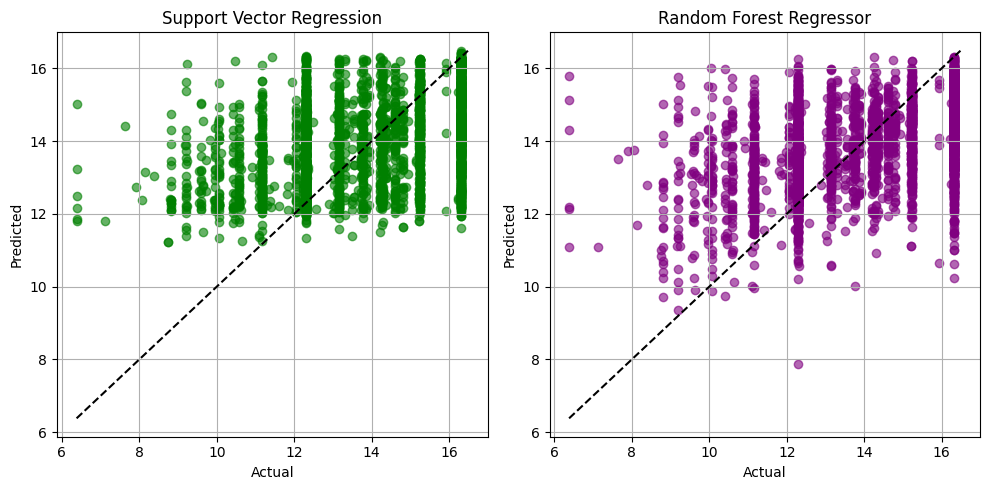

In [8]:
#minimum of the vars for plotting
miny = min(y_test.min(), y_pred_svr.min(), y_pred_rf.min())
maxy = max(y_test.max(), y_pred_svr.max(), y_pred_rf.max())

plt.figure(figsize=(10, 5))

#SVR plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr, color="green", alpha=0.6)
plt.plot([miny,maxy],[miny,maxy],"k--") #one to one line
plt.title("Support Vector Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)

#RF plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color="purple", alpha=0.6)
plt.plot([miny,maxy],[miny,maxy],"k--") #one to one line
plt.title("Random Forest Regressor")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)

plt.tight_layout()
plt.show()